In [3005]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.feature_selection import RFE
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

In [3006]:
df = pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round3.csv')

In [3007]:
df

,Unnamed: 0,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,0,central,4809,no,basic,college,2/18/11,feb,employed,m,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,...,31,1,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,...,40,2,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [3008]:
df.columns

Index(['Unnamed: 0', 'region', 'customer_lifetime_value', 'response',
       'coverage', 'education', 'effective_to_date', 'month',
       'employment_status', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [3009]:
#sns.pairplot(df)

## Correlation Heatmap


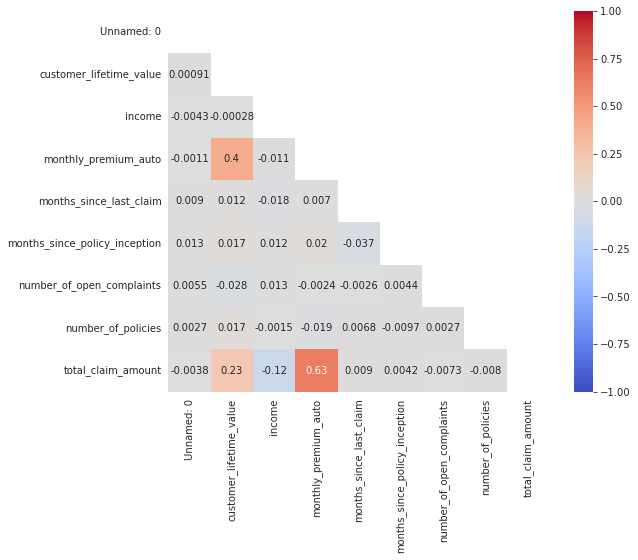

In [3010]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [3011]:
corr_matrix=df.corr().abs()
upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
drop_col = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.39)]

In [3012]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     10689 non-null  int64 
 1   region                         10689 non-null  object
 2   customer_lifetime_value        10689 non-null  int64 
 3   response                       10689 non-null  object
 4   coverage                       10689 non-null  object
 5   education                      10689 non-null  object
 6   effective_to_date              10689 non-null  object
 7   month                          10689 non-null  object
 8   employment_status              10689 non-null  object
 9   gender                         10689 non-null  object
 10  income                         10689 non-null  int64 
 11  location_code                  10689 non-null  object
 12  marital_status                 10689 non-null  object
 13  m

In [3013]:
#df.drop(drop_col,\
#           axis=1,inplace=True)

In [3014]:
df

,Unnamed: 0,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,0,central,4809,no,basic,college,2/18/11,feb,employed,m,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,...,31,1,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,...,40,2,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'monthly_premium_auto'}>,
        <AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>],
       [<AxesSubplot:title={'center':'number_of_open_complaints'}>,
        <AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>]],
      dtype=object)

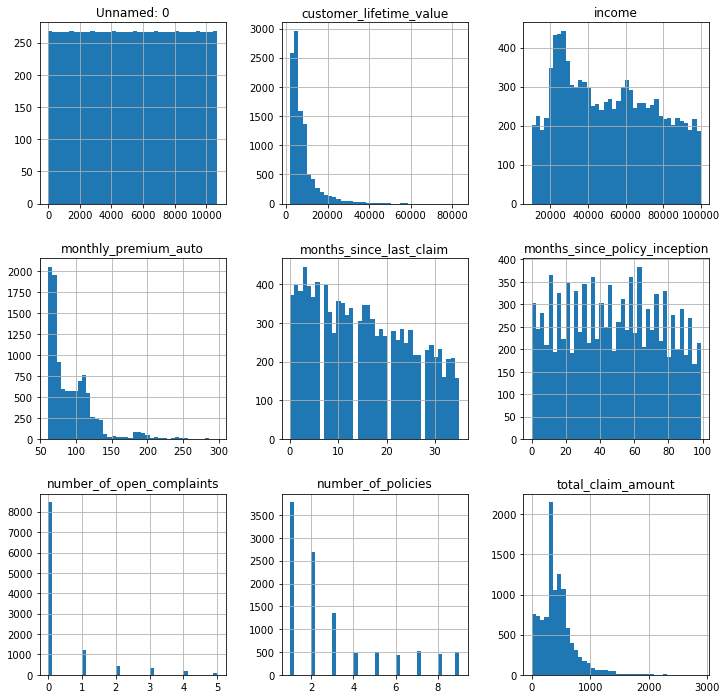

In [3015]:
df.select_dtypes('int').hist(figsize=(12,12), bins=40)

## Transforming to normal distribution (using QuantileTransformer)

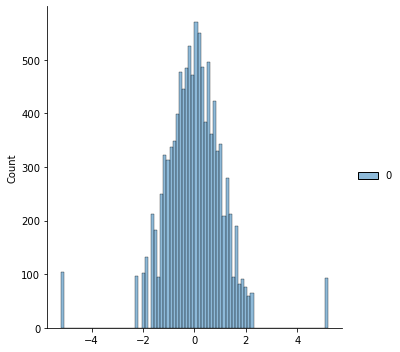

In [3016]:
## months_since_policy_inception

pt = PowerTransformer()
qt = QuantileTransformer(output_distribution="normal")
months_since_policy_inception_transformed=qt.fit_transform(df['months_since_policy_inception'].to_numpy().reshape(-1,1))
sns.displot(months_since_policy_inception_transformed)

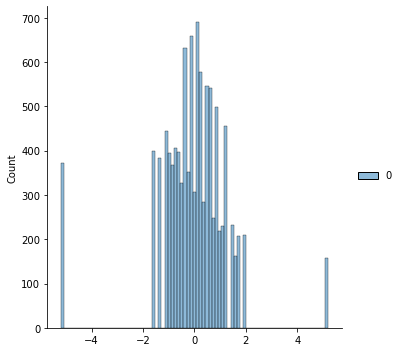

In [3017]:
## months_since_last_claim

months_since_last_claim_transformed=qt.fit_transform(df['months_since_last_claim'].to_numpy().reshape(-1,1))
sns.displot(months_since_last_claim_transformed)

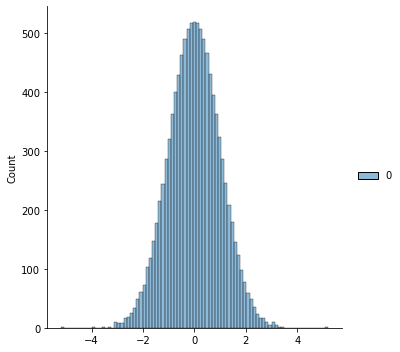

In [3018]:
## customer_lifetime_value_transformed
customer_lifetime_value_transformed=qt.fit_transform(df['customer_lifetime_value'].to_numpy().reshape(-1,1))
sns.displot(customer_lifetime_value_transformed)

In [3019]:
## total_claim_amount
#total_claim_amount_transformed=pt.fit_transform(df['total_claim_amount'].to_numpy().reshape(-1,1))
#sns.displot(total_claim_amount_transformed)



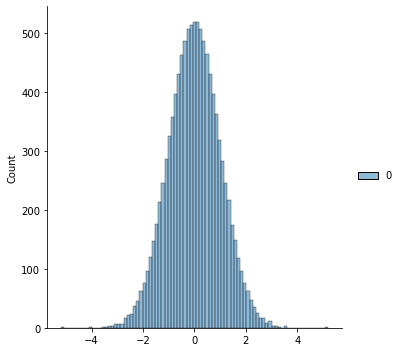

In [3020]:
##income using QuantileTransformer


income_transformed=qt.fit_transform(df['income'].to_numpy().reshape(-1,1))
sns.displot(income_transformed)

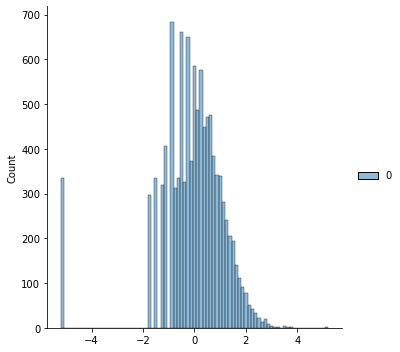

In [3021]:
## monthly premium auto
monthly_premium_auto_transformed=qt.fit_transform(df['monthly_premium_auto'].to_numpy().reshape(-1,1))
sns.displot(monthly_premium_auto_transformed)


In [3022]:
## 'number_of_open_complaints'
## number_of_open_complaints_transformed=qt.fit_transform(df['number_of_open_complaints'].to_numpy().reshape(-1,1))
## sns.displot(number_of_open_complaints_transformed)

In [3023]:
## 'number_of_policies'
## number_of_policies_transformed=qt.fit_transform(df['number_of_policies'].to_numpy().reshape(-1,1))
## sns.displot(number_of_policies_transformed)

In [3024]:
## add transformed columns, drop untransformed

In [3025]:
transformed_cols = ['months_since_last_claim_transformed', 'months_since_policy_inception_transformed', 
'monthly_premium_auto_transformed', 'income_transformed', 
'customer_lifetime_value_transformed']
#  'number_of_policies_transformed', 'number_of_open_complaints_transformed'


df["months_since_last_claim_transformed"]= months_since_last_claim_transformed
df.drop(["months_since_last_claim"],axis=1,inplace=True)


df["months_since_policy_inception_transformed"]= months_since_policy_inception_transformed
df.drop(["months_since_policy_inception"],axis=1,inplace=True)


df["monthly_premium_auto_transformed"]= monthly_premium_auto_transformed
df.drop(["monthly_premium_auto"],axis=1,inplace=True)

df["income_transformed"]= income_transformed
df.drop(["income"],axis=1,inplace=True)


df["customer_lifetime_value_transformed"]= customer_lifetime_value_transformed
df.drop(["customer_lifetime_value"],axis=1,inplace=True)

#df["number_of_policies_transformed"]= number_of_policies_transformed
#df.drop(["number_of_policies"],axis=1,inplace=True)

# df["number_of_open_complaints_transformed"]= number_of_open_complaints_transformed
#df.drop(["number_of_open_complaints"],axis=1,inplace=True)

In [3026]:
df

,Unnamed: 0,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,...,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,months_since_last_claim_transformed,months_since_policy_inception_transformed,monthly_premium_auto_transformed,income_transformed,customer_lifetime_value_transformed
0,0,central,no,basic,college,2/18/11,feb,employed,m,suburban,...,offer3,agent,292,four-door car,medsize,-0.590949,0.109365,-5.199338,-0.058675,-0.395505
1,1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,...,offer4,call center,744,four-door car,medsize,-1.132898,-0.624145,-1.250242,-0.794461,-2.351750
2,2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,...,offer3,call center,480,suv,medsize,1.968165,-0.464007,0.393847,-1.150034,1.239030
3,3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,...,offer2,branch,484,four-door car,medsize,-0.334851,-1.817968,0.329548,-0.027837,1.674186
4,4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,...,offer1,branch,707,four-door car,medsize,0.062770,-0.464007,0.993800,-1.018358,0.681761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,...,offer3,web,1214,luxury car,medsize,-0.492137,-0.211070,2.583110,0.439976,1.288971
10685,10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,...,offer2,branch,273,four-door car,medsize,-0.590949,0.567211,-1.081940,0.323079,-0.196025
10686,10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,...,offer1,web,381,luxury suv,medsize,-0.248427,0.423855,2.119668,-0.282602,1.751677
10687,10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,...,offer1,branch,618,suv,medsize,-5.199338,-0.593940,1.620664,0.421059,0.992889


## Transforming number_of_open_complaints and number_of_policies to Object

In [3027]:
df['number_of_open_complaints'] = df['number_of_open_complaints'].astype('object')
df['number_of_policies']=df['number_of_policies'].astype('object')

In [3028]:
categoricals_features=df.select_dtypes("object")
categoricals_features

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,0,9,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,0,1,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,0,2,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,0,2,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,1,7,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,2,7,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,0,6,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,0,2,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,4,6,personal auto,personal l1,offer1,branch,suv,medsize


## remove outliers

In [3029]:
print(transformed_cols)

df

['months_since_last_claim_transformed', 'months_since_policy_inception_transformed', 'monthly_premium_auto_transformed', 'income_transformed', 'customer_lifetime_value_transformed']


,Unnamed: 0,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,...,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,months_since_last_claim_transformed,months_since_policy_inception_transformed,monthly_premium_auto_transformed,income_transformed,customer_lifetime_value_transformed
0,0,central,no,basic,college,2/18/11,feb,employed,m,suburban,...,offer3,agent,292,four-door car,medsize,-0.590949,0.109365,-5.199338,-0.058675,-0.395505
1,1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,...,offer4,call center,744,four-door car,medsize,-1.132898,-0.624145,-1.250242,-0.794461,-2.351750
2,2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,...,offer3,call center,480,suv,medsize,1.968165,-0.464007,0.393847,-1.150034,1.239030
3,3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,...,offer2,branch,484,four-door car,medsize,-0.334851,-1.817968,0.329548,-0.027837,1.674186
4,4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,...,offer1,branch,707,four-door car,medsize,0.062770,-0.464007,0.993800,-1.018358,0.681761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,...,offer3,web,1214,luxury car,medsize,-0.492137,-0.211070,2.583110,0.439976,1.288971
10685,10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,...,offer2,branch,273,four-door car,medsize,-0.590949,0.567211,-1.081940,0.323079,-0.196025
10686,10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,...,offer1,web,381,luxury suv,medsize,-0.248427,0.423855,2.119668,-0.282602,1.751677
10687,10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,...,offer1,branch,618,suv,medsize,-5.199338,-0.593940,1.620664,0.421059,0.992889


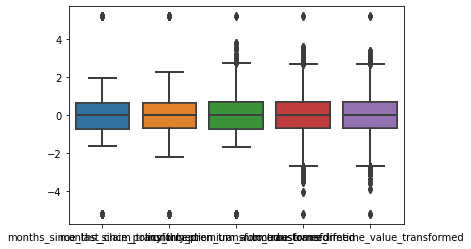

In [3030]:
for i in transformed_cols:
    sns.boxplot(data=df[transformed_cols])

In [3031]:
df.shape

(10689, 25)

In [3032]:

def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

for i in transformed_cols: 
    df = remove_outlier(df, i )


(9497, 25)


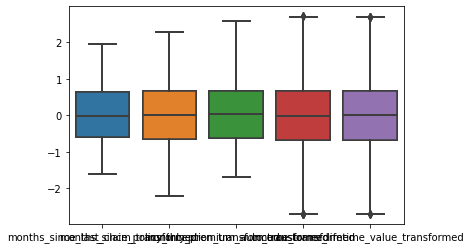

In [3033]:
for i in transformed_cols:
    sns.boxplot(data=df[transformed_cols])
print(df.shape)
    


## One-hot encoding
 Also get nominal encoding
 Use sciekitlearn 

In [3034]:
col_names_object = list(df.select_dtypes("object").columns)
col_names_object

['region',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'month',
 'employment_status',
 'gender',
 'location_code',
 'marital_status',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

In [3035]:
categoricals_features=pd.get_dummies(categoricals_features[col_names_object], drop_first=True)


C:\Users\Lenovo\anaconda3\envs\DA_Env\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [3036]:
list(categoricals_features.columns)

['region_east',
 'region_north west',
 'region_west region',
 'response_yes',
 'coverage_extended',
 'coverage_premium',
 'education_college',
 'education_doctor',
 'education_high school or below',
 'education_master',
 'effective_to_date_1/10/11',
 'effective_to_date_1/11/11',
 'effective_to_date_1/12/11',
 'effective_to_date_1/13/11',
 'effective_to_date_1/14/11',
 'effective_to_date_1/15/11',
 'effective_to_date_1/16/11',
 'effective_to_date_1/17/11',
 'effective_to_date_1/18/11',
 'effective_to_date_1/19/11',
 'effective_to_date_1/2/11',
 'effective_to_date_1/20/11',
 'effective_to_date_1/21/11',
 'effective_to_date_1/22/11',
 'effective_to_date_1/23/11',
 'effective_to_date_1/24/11',
 'effective_to_date_1/25/11',
 'effective_to_date_1/26/11',
 'effective_to_date_1/27/11',
 'effective_to_date_1/28/11',
 'effective_to_date_1/29/11',
 'effective_to_date_1/3/11',
 'effective_to_date_1/30/11',
 'effective_to_date_1/31/11',
 'effective_to_date_1/4/11',
 'effective_to_date_1/5/11',
 'ef

##  Split X-y   "total-claim-amount"

In [3037]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9497 entries, 1 to 10688
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Unnamed: 0                                 9497 non-null   int64  
 1   region                                     9497 non-null   object 
 2   response                                   9497 non-null   object 
 3   coverage                                   9497 non-null   object 
 4   education                                  9497 non-null   object 
 5   effective_to_date                          9497 non-null   object 
 6   month                                      9497 non-null   object 
 7   employment_status                          9497 non-null   object 
 8   gender                                     9497 non-null   object 
 9   location_code                              9497 non-null   object 
 10  marital_status         

In [3038]:
df.describe()

,Unnamed: 0,total_claim_amount,months_since_last_claim_transformed,months_since_policy_inception_transformed,monthly_premium_auto_transformed,income_transformed,customer_lifetime_value_transformed
count,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000
mean,5349.644414,433.407181,0.039762,-0.002681,0.058946,0.000003,0.016234
std,3083.735681,281.749075,0.871704,0.937396,0.895981,0.976817,0.958965
min,1.000000,0.000000,-1.615945,-2.196894,-1.694923,-2.703087,-2.702144
25%,2672.000000,272.000000,-0.590949,-0.653377,-0.621099,-0.674963,-0.672623
50%,5361.000000,388.000000,-0.013801,0.001255,0.033880,-0.003764,0.023702
75%,8015.000000,550.000000,0.650274,0.661162,0.672129,0.676854,0.675037
max,10688.000000,2345.000000,1.968165,2.273052,2.599042,2.714482,2.698529


In [3039]:
X=df.drop('total_claim_amount', axis=1)
y=df['total_claim_amount']

In [3040]:
X=X._get_numeric_data()
X=X.drop(['Unnamed: 0'], axis = 1)

In [3041]:
X.columns

Index(['months_since_last_claim_transformed',
       'months_since_policy_inception_transformed',
       'monthly_premium_auto_transformed', 'income_transformed',
       'customer_lifetime_value_transformed'],
      dtype='object')

In [3042]:
X.describe()

,months_since_last_claim_transformed,months_since_policy_inception_transformed,monthly_premium_auto_transformed,income_transformed,customer_lifetime_value_transformed
count,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000
mean,0.039762,-0.002681,0.058946,0.000003,0.016234
std,0.871704,0.937396,0.895981,0.976817,0.958965
min,-1.615945,-2.196894,-1.694923,-2.703087,-2.702144
25%,-0.590949,-0.653377,-0.621099,-0.674963,-0.672623
50%,-0.013801,0.001255,0.033880,-0.003764,0.023702
75%,0.650274,0.661162,0.672129,0.676854,0.675037
max,1.968165,2.273052,2.599042,2.714482,2.698529


array([[<AxesSubplot:title={'center':'months_since_last_claim_transformed'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception_transformed'}>],
       [<AxesSubplot:title={'center':'monthly_premium_auto_transformed'}>,
        <AxesSubplot:title={'center':'income_transformed'}>],
       [<AxesSubplot:title={'center':'customer_lifetime_value_transformed'}>,
        <AxesSubplot:>]], dtype=object)

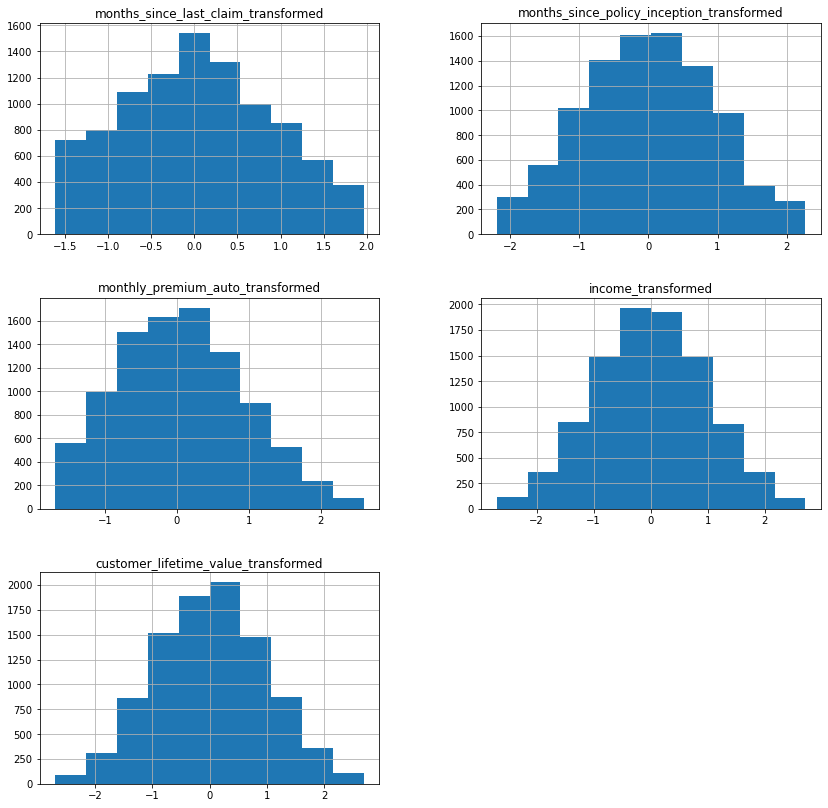

In [3043]:
X.hist(figsize=(14,14))

In [3044]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

## standardize

In [3045]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )
                                            ## 
X_train_scaled=std_scaler.transform(X_train)

In [3046]:
X_train.shape

(6647, 5)

In [3047]:
X_test_scaled=std_scaler.transform(X_test)

In [3048]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[ 0.98812208 -1.34620164  2.12952846  0.03076992  1.2672967 ]
 [ 0.21160301  0.55009578 -0.04955119 -1.19205997 -0.9336943 ]
 [ 0.29200132  1.20430545  0.12839955 -2.24762588  0.86079746]
 ...
 [-1.34329307  0.55009578 -0.15144874 -0.53146685 -0.0216094 ]
 [ 0.29200132 -1.12844992 -0.74821526 -1.02905842  0.43168712]
 [ 1.5739745  -0.40780701  0.28194887 -0.1693211  -0.79764133]]
--------
[[-0.51818449 -1.34620164  0.68909623 -1.84012089 -0.6445409 ]
 [-1.58485495 -0.27922848  0.54484152 -1.04423055  0.14417666]
 [ 1.1792187  -0.40780701  0.40554484 -2.42173836  0.29685259]
 ...
 [ 1.7324471   0.14395564 -1.09587773 -0.2851999  -0.19981281]
 [ 1.7324471   0.55009578  0.86875837 -0.21854569  1.00597486]
 [ 0.45201049 -0.3733942  -0.45672974 -0.62109564 -1.14519798]]


## Linear Regression

In [3049]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     591.0
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:59:26   Log-Likelihood:                -45730.
No. Observations:                6647   AIC:                         9.147e+04
Df Residuals:                    6641   BIC:                         9.151e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        432.9513      2.887    149.945      0.0

In [3050]:
predictions_test

array([609.84252593, 550.66817053, 573.96668865, ..., 272.22274383,
       567.14971792, 394.66146065])

In [3051]:
#display adjusted R-squared
print(model.rsquared_adj)

0.30743753252464645


In [3052]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

In [3053]:
model.coef_

array([  0.73780354,  -0.322995  , 158.41979473, -32.70944953,
       -11.60973061])

In [3054]:
y_pred=model.predict(X_test_scaled)   # model prediction

y_pred_train=model.predict(X_train_scaled)

In [3055]:
X

C:\Users\Lenovo\anaconda3\envs\DA_Env\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,months_since_last_claim_transformed,months_since_policy_inception_transformed,monthly_premium_auto_transformed,income_transformed,customer_lifetime_value_transformed
1,-1.132898,-0.624145,-1.250242,-0.794461,-2.351750
2,1.968165,-0.464007,0.393847,-1.150034,1.239030
3,-0.334851,-1.817968,0.329548,-0.027837,1.674186
4,0.062770,-0.464007,0.993800,-1.018358,0.681761
8,1.705570,-0.683178,1.606755,0.494888,0.051110
...,...,...,...,...,...
10683,-0.013801,-0.434861,1.824556,0.175587,1.495861
10684,-0.492137,-0.211070,2.583110,0.439976,1.288971
10685,-0.590949,0.567211,-1.081940,0.323079,-0.196025
10686,-0.248427,0.423855,2.119668,-0.282602,1.751677


In [3056]:
## new record 
#new_data=[2000,450,18,25]
#new_data_scaled=std_scaler.transform(np.array(new_data).reshape(-1,4))
#np.array(np.array(new_data).reshape(-1,4)).shape

In [3057]:
y_test

3412     523
317      847
9173     337
3294     224
2425     536
        ... 
6357      26
7310     340
10634    316
10319    813
1242     450
Name: total_claim_amount, Length: 2850, dtype: int64

In [3058]:
y_pred

array([609.84252593, 550.66817053, 573.96668865, ..., 272.22274383,
       567.14971792, 394.66146065])

In [3059]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

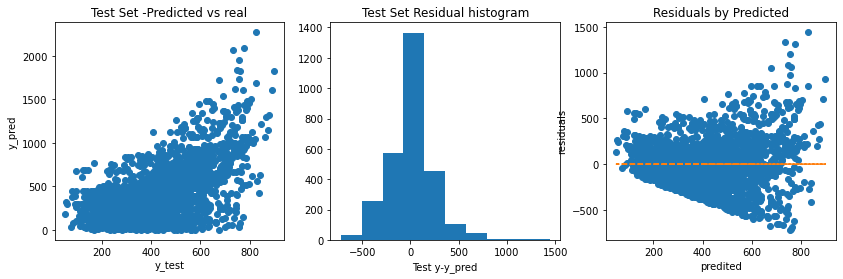

In [3060]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [3061]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

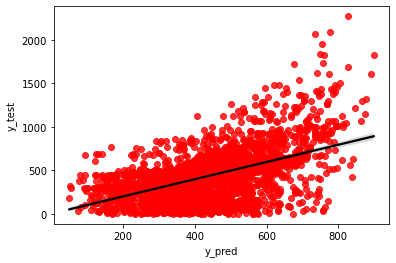

In [3062]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

In [3063]:
print('MSE test: ',  mse(y_test,y_pred))
print('MAE test: ', mae(y_test,y_pred))
print('MSE train: ', mse(y_train,y_pred_train))
R2=r2_score(y_test,y_pred)
print(R2)
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)
print('R2_test: ', R2_test)
print('R2_train: ', R2_train)

print('MSE train - MSE test: ', mse(y_train,y_pred_train) - mse(y_test,y_pred) )
print('R2_test/R2_train: ', R2_test/R2_train )
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adj_R2:', Adj_R2)

MSE test:  54345.658061024995
MAE test:  164.98521479750886
MSE train:  55366.669611123056
0.30238141188577194
R2_test:  0.30238141188577194
R2_train:  0.307958569590156
MSE train - MSE test:  1021.011550098061
R2_test/R2_train:  0.9818899090491089
Adj_R2: 0.3011549375747413


## Add categoricals to model

In [3064]:
col_names_object

['region',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'month',
 'employment_status',
 'gender',
 'location_code',
 'marital_status',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

In [3065]:
categoricals_features

,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,0,1,0,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
10686,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,0,0,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [3066]:
## add one-hot encoded, drop cat

df = df.drop(col_names_object, axis=1)


In [3067]:
df[categoricals_features.columns] = categoricals_features
df

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18196\373345703.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[categoricals_features.columns] = categoricals_features
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18196\373345703.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[categoricals_features.columns] = categoricals_features
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18196\373345703.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which h

,Unnamed: 0,total_claim_amount,months_since_last_claim_transformed,months_since_policy_inception_transformed,monthly_premium_auto_transformed,income_transformed,customer_lifetime_value_transformed,region_east,region_north west,region_west region,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
1,1,744,-1.132898,-0.624145,-1.250242,-0.794461,-2.351750,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,2,480,1.968165,-0.464007,0.393847,-1.150034,1.239030,1,0,0,...,0,1,0,0,0,0,1,0,1,0
3,3,484,-0.334851,-1.817968,0.329548,-0.027837,1.674186,0,1,0,...,1,0,0,0,0,0,0,0,1,0
4,4,707,0.062770,-0.464007,0.993800,-1.018358,0.681761,0,1,0,...,1,0,0,0,0,0,0,0,1,0
8,8,739,1.705570,-0.683178,1.606755,0.494888,0.051110,0,0,1,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10683,10683,897,-0.013801,-0.434861,1.824556,0.175587,1.495861,0,0,0,...,1,0,0,0,1,0,0,0,1,0
10684,10684,1214,-0.492137,-0.211070,2.583110,0.439976,1.288971,0,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,10685,273,-0.590949,0.567211,-1.081940,0.323079,-0.196025,0,1,0,...,1,0,0,0,0,0,0,0,1,0
10686,10686,381,-0.248427,0.423855,2.119668,-0.282602,1.751677,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [3068]:
X=df.drop('total_claim_amount', axis=1)
y=df['total_claim_amount']
#X=X.drop(['Unnamed: 0', 'monthly_premium_auto_transformed'], axis = 1)
list(X.columns)

['Unnamed: 0',
 'months_since_last_claim_transformed',
 'months_since_policy_inception_transformed',
 'monthly_premium_auto_transformed',
 'income_transformed',
 'customer_lifetime_value_transformed',
 'region_east',
 'region_north west',
 'region_west region',
 'response_yes',
 'coverage_extended',
 'coverage_premium',
 'education_college',
 'education_doctor',
 'education_high school or below',
 'education_master',
 'effective_to_date_1/10/11',
 'effective_to_date_1/11/11',
 'effective_to_date_1/12/11',
 'effective_to_date_1/13/11',
 'effective_to_date_1/14/11',
 'effective_to_date_1/15/11',
 'effective_to_date_1/16/11',
 'effective_to_date_1/17/11',
 'effective_to_date_1/18/11',
 'effective_to_date_1/19/11',
 'effective_to_date_1/2/11',
 'effective_to_date_1/20/11',
 'effective_to_date_1/21/11',
 'effective_to_date_1/22/11',
 'effective_to_date_1/23/11',
 'effective_to_date_1/24/11',
 'effective_to_date_1/25/11',
 'effective_to_date_1/26/11',
 'effective_to_date_1/27/11',
 'effectiv

In [3069]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

In [3070]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

In [3071]:
X_train.shape

(6647, 120)

In [3072]:
X_test_scaled=std_scaler.transform(X_test)

In [3073]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-1.47802848  0.98812208 -1.34620164 ... -0.51350581  0.63732039
  -0.4767489 ]
 [ 1.20112539  0.21160301  0.55009578 ... -0.51350581  0.63732039
  -0.4767489 ]
 [-1.06731522  0.29200132  1.20430545 ... -0.51350581 -1.56906952
  -0.4767489 ]
 ...
 [ 0.16224347 -1.34329307  0.55009578 ...  1.94739765 -1.56906952
  -0.4767489 ]
 [-1.24186029  0.29200132 -1.12844992 ... -0.51350581  0.63732039
  -0.4767489 ]
 [-0.43462968  1.5739745  -0.40780701 ... -0.51350581 -1.56906952
  -0.4767489 ]]
--------
[[-0.63659865 -0.51818449 -1.34620164 ... -0.51350581  0.63732039
  -0.4767489 ]
 [-1.6351513  -1.58485495 -0.27922848 ... -0.51350581  0.63732039
  -0.4767489 ]
 [ 1.22209661  1.1792187  -0.40780701 ... -0.51350581  0.63732039
  -0.4767489 ]
 ...
 [ 1.69346508  1.7324471   0.14395564 ... -0.51350581  0.63732039
  -0.4767489 ]
 [ 1.59183533  1.7324471   0.55009578 ... -0.51350581  0.63732039
  -0.4767489 ]
 [-1.33671473  0.45201049 -0.3733942  ... -0.51350581  0.63732039
  -0.4767489 ]]


In [3074]:
## add transformed columns, drop untransformed

In [3075]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     168.5
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:59:30   Log-Likelihood:                -42329.
No. Observations:                6647   AIC:                         8.489e+04
Df Residuals:                    6529   BIC:                         8.570e+04
Df Model:                         117                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        432.9513      1.746    247.988      0.0

In [3076]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

In [3077]:
y_pred=model.predict(X_test_scaled)   # model prediction

y_pred_train=model.predict(X_train_scaled)

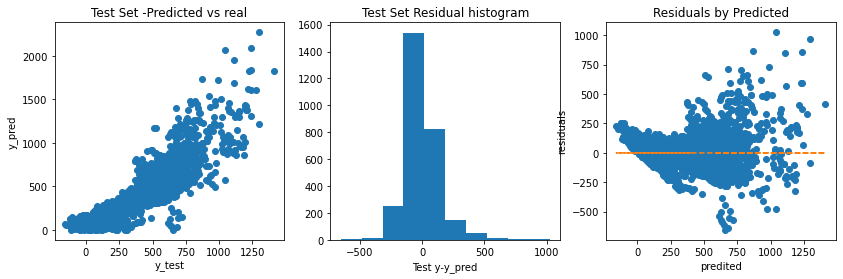

In [3078]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [3079]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

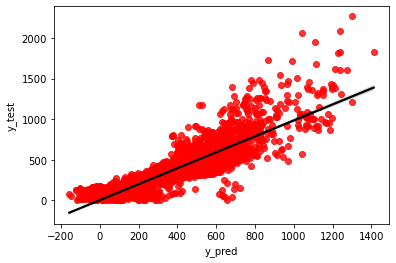

In [3080]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

In [3081]:
print('MSE test: ',  mse(y_test,y_pred))
print('MAE test: ', mae(y_test,y_pred))
print('MSE train: ', mse(y_train,y_pred_train))
R2=r2_score(y_test,y_pred)
print(R2)
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)
print('R2_test: ', R2_test)
print('R2_train: ', R2_train)

print('MSE train - MSE test: ', mse(y_train,y_pred_train) - mse(y_test,y_pred) )
print('R2_test/R2_train: ', R2_test/R2_train )
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adj_R2:', Adj_R2)

MSE test:  20593.12226665707
MAE test:  100.81041865127443
MSE train:  19900.55728125131
0.7356523889287132
R2_test:  0.7356523889287132
R2_train:  0.7512581084685032
MSE train - MSE test:  -692.5649854057592
R2_test/R2_train:  0.979227219827812
Adj_R2: 0.7240284558658497


## Feature importance

In [3082]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

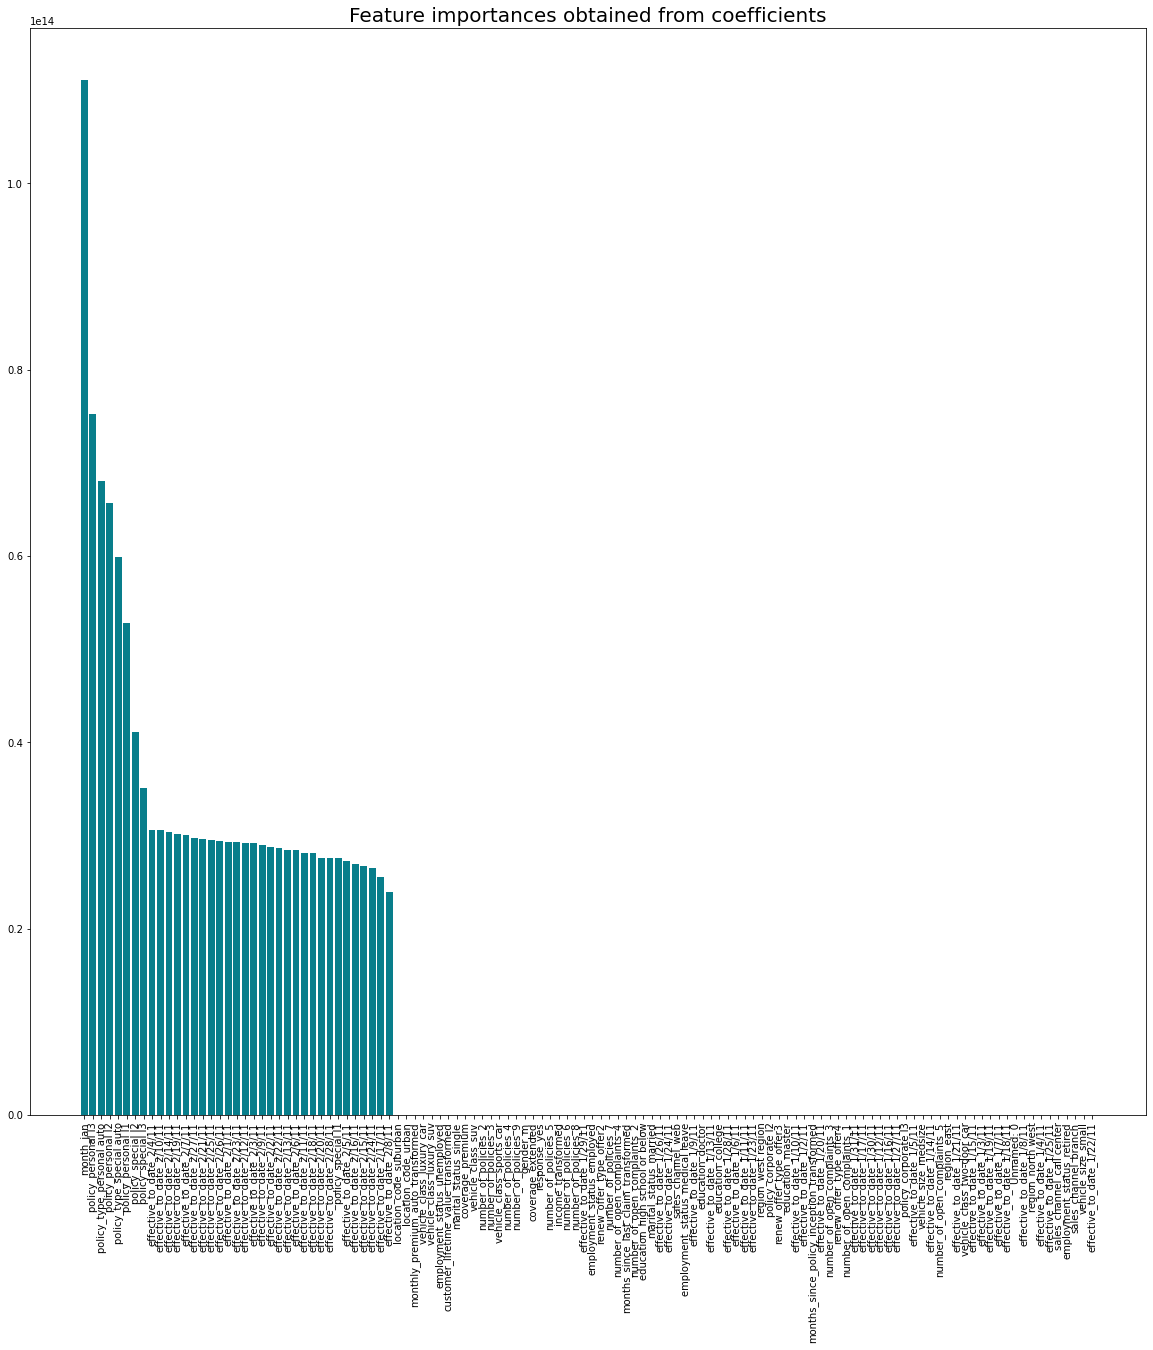

In [3083]:
plt.figure(figsize=(20, 20))
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')

plt.show()

## Trying to drop variables to get better AIC

In [3084]:
# Running RFE with the output number of the variable equal to 9

rfe = RFE(model)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)
print(X_train.columns.size)

print(X_train.columns[rfe.support_].size)

[False False False  True False  True False False False  True False  True
 False False False False False False False False False False False False
 False False False False False False False  True False  True False False
  True False False False False False False False False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True False  True False  True  True False  True
 False  True False  True False  True  True  True False False False False
  True  True  True False False  True  True  True  True  True  True False
 False False False False False  True  True  True  True False False False]
[61 33 55  1 27  1 42 57 34  1 15  1 29 20 18 28 11 19 30  7 49 43 36 37
 48 47  8 10 17 60 21  1 51  1 39  9  1 45 31 32 50 12  6 46 52  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1 13  1 54  1 14  1  1 26  1 35  1 23  1 1

## Linear regression dropping columns that are not important form AIC optimization

In [3085]:
list(X.columns[rfe.support_])

X=df.drop('total_claim_amount', axis=1)
y=df['total_claim_amount']
X=X[list(X.columns[rfe.support_])]
list(X.columns)


['monthly_premium_auto_transformed',
 'customer_lifetime_value_transformed',
 'response_yes',
 'coverage_premium',
 'effective_to_date_1/24/11',
 'effective_to_date_1/26/11',
 'effective_to_date_1/29/11',
 'effective_to_date_1/9/11',
 'effective_to_date_2/1/11',
 'effective_to_date_2/10/11',
 'effective_to_date_2/11/11',
 'effective_to_date_2/12/11',
 'effective_to_date_2/13/11',
 'effective_to_date_2/14/11',
 'effective_to_date_2/15/11',
 'effective_to_date_2/16/11',
 'effective_to_date_2/17/11',
 'effective_to_date_2/18/11',
 'effective_to_date_2/19/11',
 'effective_to_date_2/2/11',
 'effective_to_date_2/20/11',
 'effective_to_date_2/21/11',
 'effective_to_date_2/22/11',
 'effective_to_date_2/23/11',
 'effective_to_date_2/24/11',
 'effective_to_date_2/25/11',
 'effective_to_date_2/26/11',
 'effective_to_date_2/27/11',
 'effective_to_date_2/28/11',
 'effective_to_date_2/3/11',
 'effective_to_date_2/4/11',
 'effective_to_date_2/5/11',
 'effective_to_date_2/6/11',
 'effective_to_date_2/

In [3086]:
X

,monthly_premium_auto_transformed,customer_lifetime_value_transformed,response_yes,coverage_premium,effective_to_date_1/24/11,effective_to_date_1/26/11,effective_to_date_1/29/11,effective_to_date_1/9/11,effective_to_date_2/1/11,effective_to_date_2/10/11,...,policy_personal l1,policy_personal l2,policy_personal l3,policy_special l1,policy_special l2,policy_special l3,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv
1,-1.250242,-2.351750,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0.393847,1.239030,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,0.329548,1.674186,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.993800,0.681761,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,1.606755,0.051110,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10683,1.824556,1.495861,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
10684,2.583110,1.288971,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
10685,-1.081940,-0.196025,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
10686,2.119668,1.751677,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### splitting, scalling using minmax

In [3087]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )
minmax_scaler=MinMaxScaler().fit(X_train)
X_train_scaled=std_scaler.transform(X_train)

X_test_scaled=std_scaler.transform(X_test)


In [3088]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)



                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     341.0
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:59:37   Log-Likelihood:                -42388.
No. Observations:                6647   AIC:                         8.489e+04
Df Residuals:                    6589   BIC:                         8.529e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        432.9513      1.753    246.944      0.0

MSE test:  20772.118570852694
MAE test:  101.0292845091657
MSE train:  20253.78031227344
0.7333546681269816
R2_test:  0.7333546681269816
R2_train:  0.7468430881438357
MSE train - MSE test:  -518.3382585792533
R2_test/R2_train:  0.9819394190948764
Adj_R2: 0.727618303870122


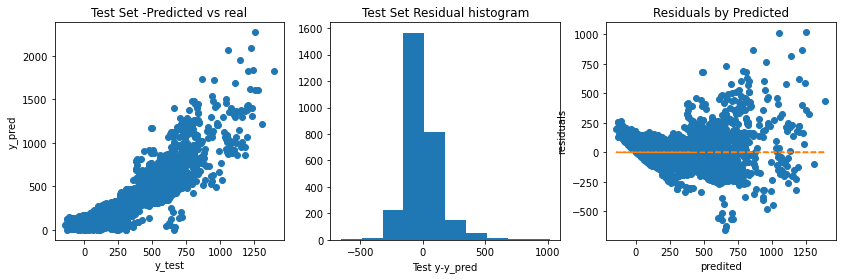

In [3089]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train
y_pred=model.predict(X_test_scaled)   # model prediction

y_pred_train=model.predict(X_train_scaled)
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')
print('MSE test: ',  mse(y_test,y_pred))
print('MAE test: ', mae(y_test,y_pred))
print('MSE train: ', mse(y_train,y_pred_train))
R2=r2_score(y_test,y_pred)
print(R2)
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)
print('R2_test: ', R2_test)
print('R2_train: ', R2_train)

print('MSE train - MSE test: ', mse(y_train,y_pred_train) - mse(y_test,y_pred) )
print('R2_test/R2_train: ', R2_test/R2_train )
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adj_R2:', Adj_R2)

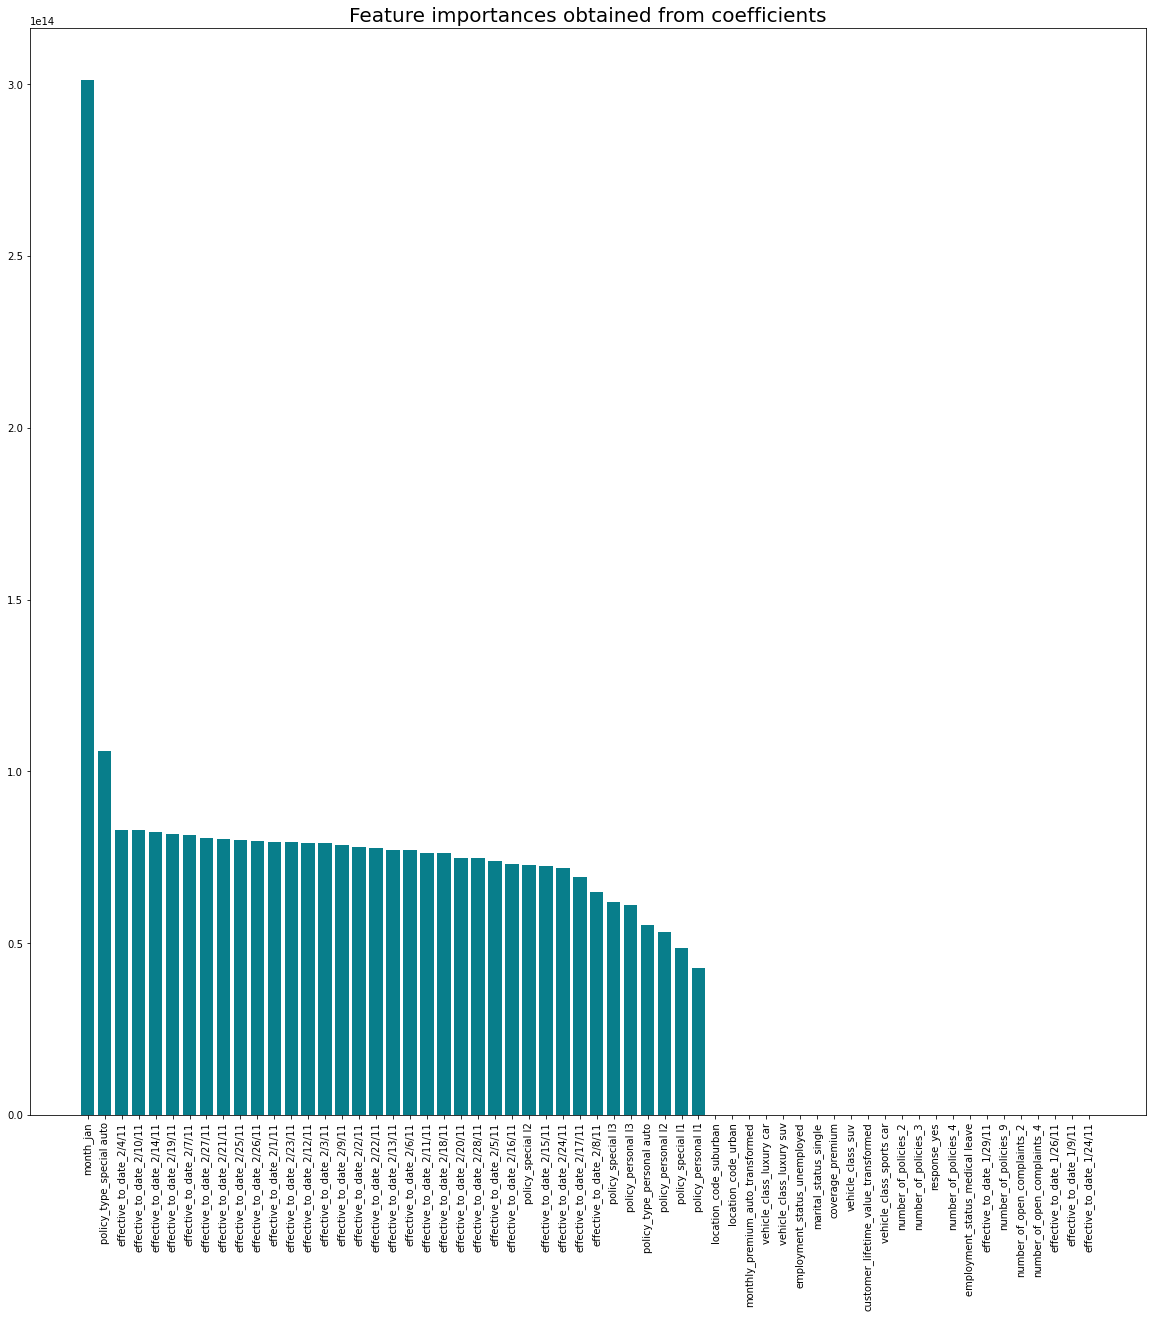

In [3090]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(20, 20))
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')

plt.show()

## QT, Maxmin, Outliers: Boxplot

MSE test:  20776.82917943051

MAE test:  101.05867872807018

MSE train:  20253.474745677973

0.73329419948565

R2_test:  0.73329419948565

R2_train:  0.7468469074948152

MSE train - MSE test:  -523.3544337525382

R2_test/R2_train:  0.981853432245404

Adj_R2: 0.727556534361641

## QT, Std_Scaler, Outliers: Boxplot

MSE test:  20772.118570852694

MAE test:  101.0292845091657

MSE train:  20253.78031227344

0.7333546681269816

R2_test:  0.7333546681269816

R2_train:  0.7468430881438357

MSE train - MSE test:  -518.3382585792533

R2_test/R2_train:  0.9819394190948764

Adj_R2: 0.727618303870122